In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
players = pd.read_csv('Players.csv', index_col=0)
players.reset_index(drop=True).head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [3]:
players.dropna(inplace=True)

In [ ]:
players.info()

In [4]:
players.head()
players.rename(columns={'Player' : "player"})


,player,height,weight,collage,born,birth_city,birth_state
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky
6,Charlie Black,196.0,90.0,University of Kansas,1921.0,Arco,Idaho
7,Nelson Bobb,183.0,77.0,Temple University,1924.0,Philadelphia,Pennsylvania
8,Jake Bornheimer,196.0,90.0,Muhlenberg College,1927.0,New Brunswick,New Jersey
...,...,...,...,...,...,...,...
3915,Okaro White,203.0,92.0,Florida State University,1992.0,Clearwater,Florida
3916,Isaiah Whitehead,193.0,96.0,Seton Hall University,1995.0,Brooklyn,New York
3917,Troy Williams,198.0,97.0,South Carolina State University,1969.0,Columbia,South Carolina
3918,Kyle Wiltjer,208.0,108.0,Gonzaga University,1992.0,Portland,Oregon


In [24]:
players.head()

,Player,height,weight,collage,born,birth_city,birth_state
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [39]:
players.collage.unique()

392

In [166]:
top_pl = players.birth_state.value_counts().head().index
colors = ['red', 'blue', 'green', 'yellow', 'purple']
sizes = [10, 30, 50, 70, 90]
forms = ['o', '<', '^', '>', 'v']
colors_map = dict(zip(top_pl, colors))
colors_map

{'California': 'red',
 'New York': 'blue',
 'Illinois': 'green',
 'Pennsylvania': 'yellow',
 'Ohio': 'purple'}

In [ ]:
players[players.birth_state.isin(top_pl)].loc[3918]

In [2]:
import seaborn as sns

In [ ]:
top_players = players[players.birth_state.isin(top_pl)]
# fig, axs = plt.subplots()

# for i, (key, gr) in enumerate(grp, 1):
    # gr.plot(ax = ax, kind='scatter', x='height', y='weight', marker=colors_map[key])
    # ax1 = plt.subplot(2, 3, i)

top_players.set_index('height', drop=True).groupby('birth_state')['weight']
    # top_players[top_players['birth_state']== st].plot(ax = ax, kind='scatter', x='height', y='weight', marker=colors_map[st])

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(3, 2, sharey=True, sharex=True)

<AxesSubplot:xlabel='height', ylabel='weight'>

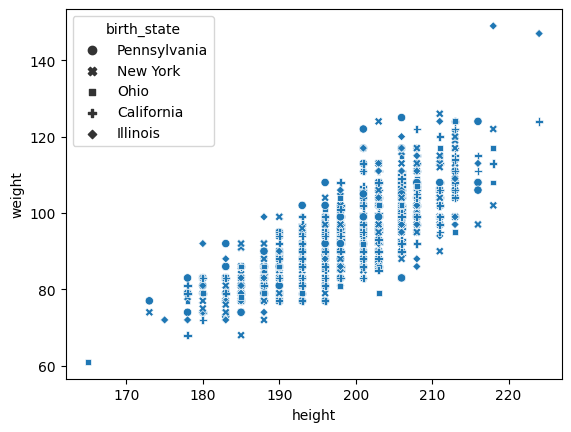

<AxesSubplot:xlabel='born', ylabel='height'>

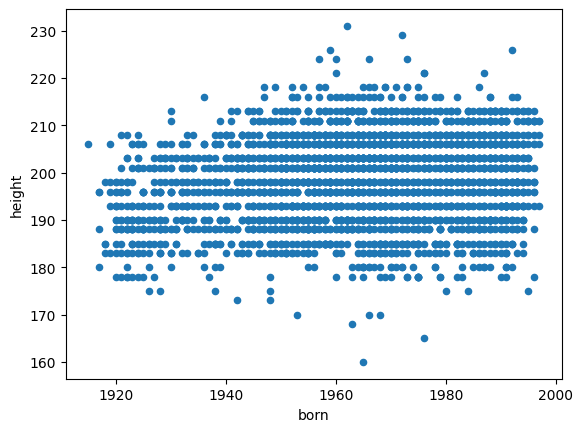

In [43]:
players[players.collage == ].plot(kind='scatter', x='born', y='height')

In [3]:
ss = pd.read_csv('Seasons_Stats.csv', index_col=0)

In [5]:
col = ['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', '3P', '3PA', '2P', '2PA', 'PF', 'PTS', 'AST']
ss = ss[col]
ss.head()

,Year,Player,Pos,Age,Tm,G,MP,3P,3PA,2P,2PA,PF,PTS,AST
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,144.0,516.0,217.0,458.0,176.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,102.0,274.0,99.0,279.0,109.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,174.0,499.0,192.0,438.0,140.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,22.0,86.0,29.0,63.0,20.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,21.0,82.0,27.0,59.0,20.0


In [7]:
import statsmodels.api as sm

<AxesSubplot:xlabel='PTS', ylabel='Count'>

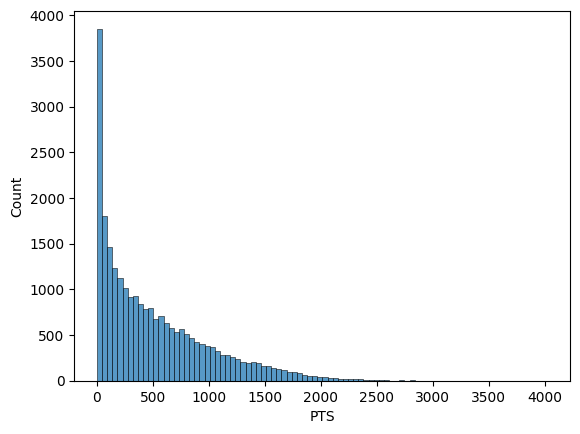

In [10]:
import seaborn as sns
sns.histplot(ss.PTS)

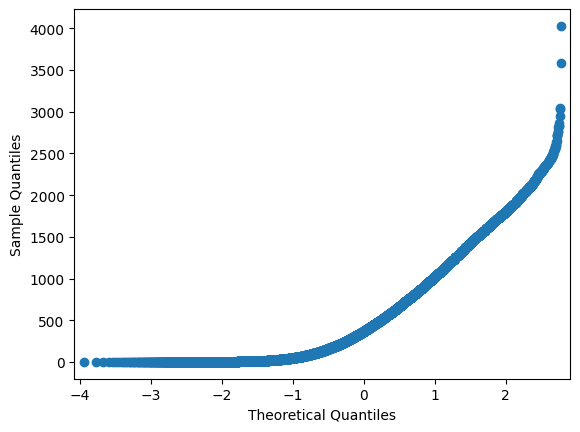

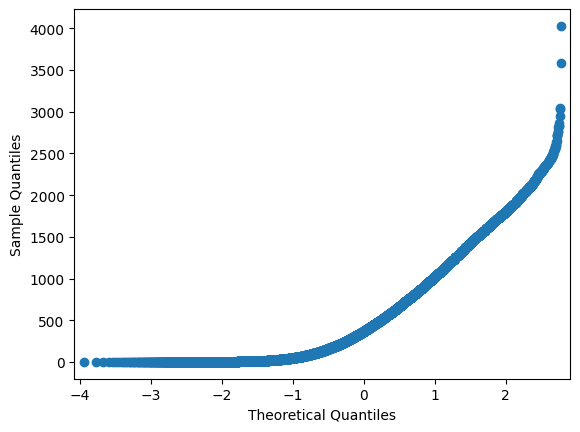

In [9]:
sm.qqplot(ss.PTS)

In [213]:
ss.dropna(subset=['Age'], inplace=True)

In [215]:
ss.fillna(0, inplace=True)

In [ ]:
change_col = list(filter(lambda x: x not in ['Player', 'Pos', 'Tm'], ss.columns))
d = dict(zip(change_col, ['int32']*len(change_col)))
d

In [234]:
ss.head()

,Year,Player,Pos,Age,Tm,G,MP,3P,3PA,2P,2PA,PF,PTS,AST
0,1950,Curly Armstrong,G-F,31,FTW,63,0,0,0,144,516,217,458,176
1,1950,Cliff Barker,SG,29,INO,49,0,0,0,102,274,99,279,109
2,1950,Leo Barnhorst,SF,25,CHS,67,0,0,0,174,499,192,438,140
3,1950,Ed Bartels,F,24,TOT,15,0,0,0,22,86,29,63,20
4,1950,Ed Bartels,F,24,DNN,13,0,0,0,21,82,27,59,20


In [456]:
ss.groupby('Player').sum().sort_values('PTS', ascending=False).head(10)

,Year,Age,G,MP,3P,3PA,2P,2PA,PF,PTS,AST
Player,,,,,,,,,,,
Kareem Abdul-Jabbar*,39590,630,1560,57446,1,18,15836,28289,4657,38387,5660
Karl Malone*,37905,589,1476,54852,85,310,13443,25900,4578,36928,5248
Wilt Chamberlain*,31461,469,1118,51160,0,0,13744,25580,2221,33953,4893
Kobe Bryant,40130,550,1346,48637,1827,5546,9892,20654,3353,33643,6306
Michael Jordan*,29892,432,1072,41011,581,1778,11611,22759,2783,32292,5633
Eddie Johnson,65607,975,2078,57054,783,2334,11946,24568,5058,31852,6482
Dirk Nowitzki,38152,551,1394,48673,1780,4668,8908,17932,3379,30260,3496
Shaquille O'Neal*,42054,621,1268,43666,1,22,11660,19993,4374,29428,3119
LeBron James,28147,357,1061,41272,1467,4295,8956,16508,1977,28787,7461


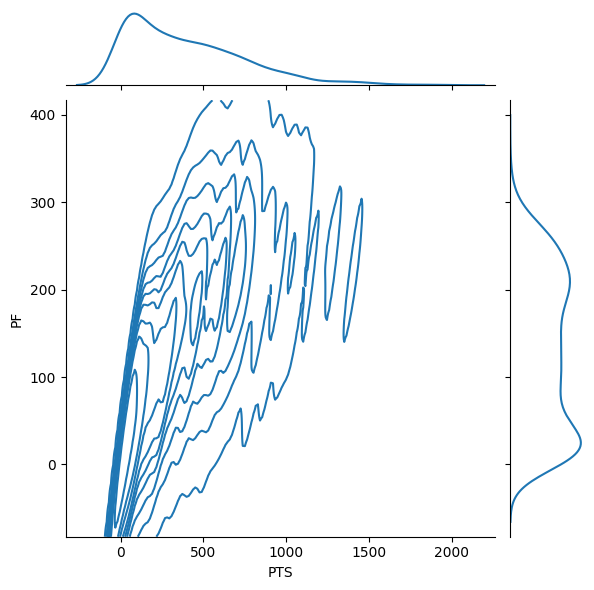

In [444]:
sns.pairplot(data=ss[])

<AxesSubplot:xlabel='Age', ylabel='Pos'>

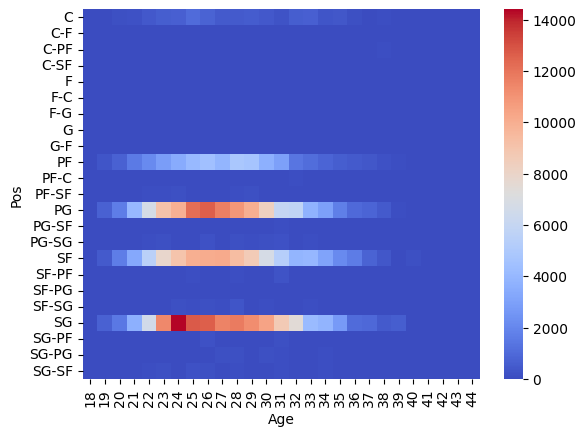

In [421]:
fh = pd.pivot_table(ss, index='Pos', columns='Age', values='3P', aggfunc='sum').fillna(0)
sns.heatmap(fh, cmap='coolwarm')

In [434]:
ss[['Year', 'Player', 'Pos', 'Age']]

,Year,Player,Pos,Age
0,1950,Curly Armstrong,G-F,31
1,1950,Cliff Barker,SG,29
2,1950,Leo Barnhorst,SF,25
3,1950,Ed Bartels,F,24
4,1950,Ed Bartels,F,24
...,...,...,...,...
24686,2017,Cody Zeller,PF,24
24687,2017,Tyler Zeller,C,27
24688,2017,Stephen Zimmerman,C,20
24689,2017,Paul Zipser,SF,22


In [ ]:
sns.pairplot(ss[['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', '3P', '3PA', '2P', '2PA', 'PF', 'PTS', 'AST']])

In [ ]:
pd.plotting.scatter_matrix(ss[['3P', '3PA', '2P', '2PA', 'PF', 'PTS', 'AST']], alpha=0.2, figsize=(6, 6))

In [440]:
ss.corr()
# sns.heatmap(cor, cmap='coolwarm')

,Year,Age,G,MP,3P,3PA,2P,2PA,PF,PTS,AST
Year,1.000000,0.077126,-0.100280,-0.044960,0.353585,0.369699,-0.188326,-0.245571,-0.218536,-0.101694,-0.083183
Age,0.077126,1.000000,0.027398,0.058460,0.073263,0.066865,0.004719,0.003131,0.013178,0.021449,0.063973
G,-0.100280,0.027398,1.000000,0.841594,0.307992,0.321273,0.707273,0.714085,0.860250,0.727343,0.587775
MP,-0.044960,0.058460,0.841594,1.000000,0.394717,0.410014,0.883096,0.877451,0.855314,0.915671,0.737656
3P,0.353585,0.073263,0.307992,0.394717,1.000000,0.991527,0.154390,0.149197,0.163351,0.382208,0.377891
3PA,0.369699,0.066865,0.321273,0.410014,0.991527,1.000000,0.170311,0.164917,0.172375,0.395581,0.401273
2P,-0.188326,0.004719,0.707273,0.883096,0.154390,0.170311,1.000000,0.989078,0.785321,0.966596,0.656983
2PA,-0.245571,0.003131,0.714085,0.877451,0.149197,0.164917,0.989078,1.000000,0.794277,0.957743,0.666082
PF,-0.218536,0.013178,0.860250,0.855314,0.163351,0.172375,0.785321,0.794277,1.000000,0.771999,0.550477
PTS,-0.101694,0.021449,0.727343,0.915671,0.382208,0.395581,0.966596,0.957743,0.771999,1.000000,0.708892


<AxesSubplot:xlabel='PTS', ylabel='PF'>

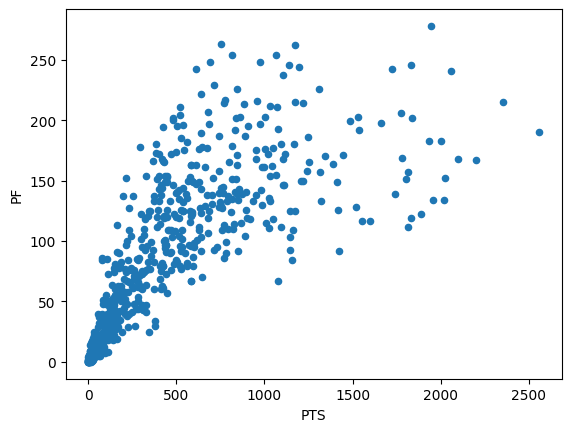

In [390]:
ss[['PTS', 'PF']][ss.Year == 2017].plot(kind='scatter', x='PTS', y='PF')

In [ ]:
ss[['Age', 'G', 'MP', '3P', '2P', 'PF']].hist()

In [ ]:
for i, col in enumerate(['Age', 'G', 'MP', '3P', '2P', 'PF']):
    ax = plt.subplot(2, 3, i+1)
    sns.boxplot(ss[col], ax=ax)

In [ ]:
ss.groupby('Year')['Age'].mean().plot.line()

In [405]:
top_res_pos = ss.groupby('Pos')['PTS'].sum().sort_values(ascending=False).head().index.values

In [422]:
test = (ss[ss.Pos.isin(top_res_pos)]
    # [['2P', '3P']]
    # .plot.box()
    
)
# sns.boxplot(tt)

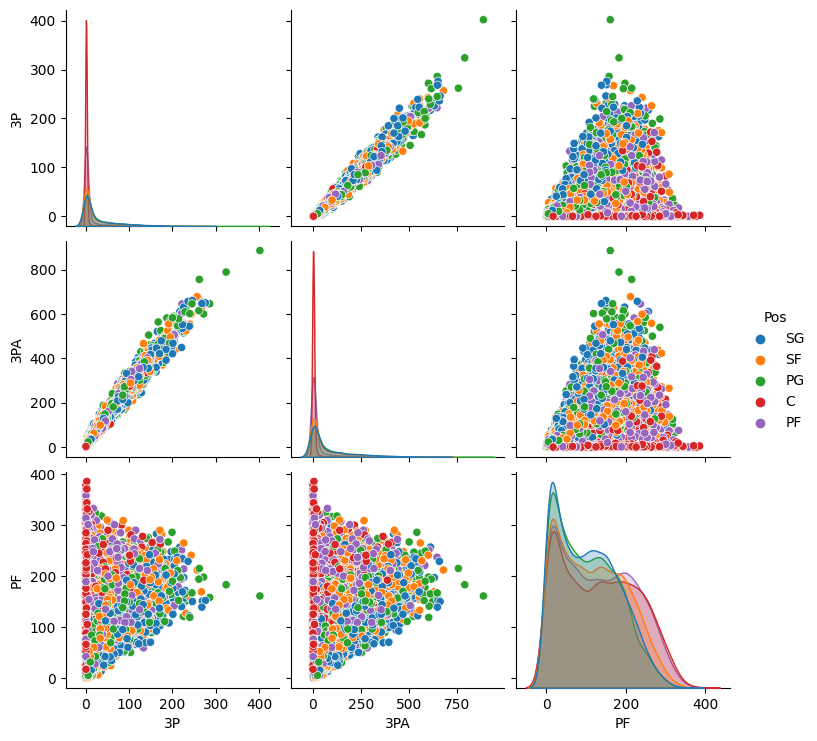

In [448]:
sns.pairplot(test[["3P", '3PA', 'PF', 'Pos']], hue='Pos')

In [428]:
cmap = plt.cm.get_cmap('Spectral')

<AxesSubplot:xlabel='Year'>

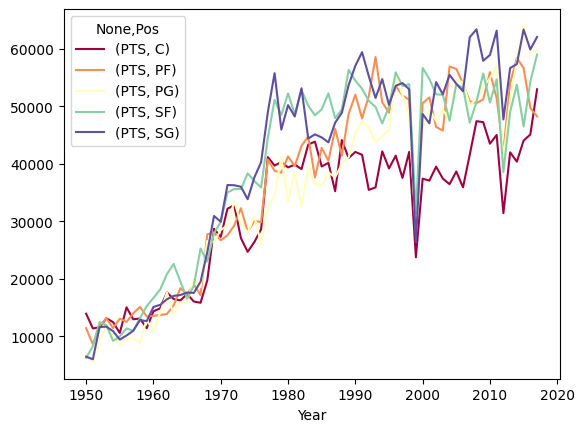

In [445]:
test.groupby(['Year','Pos'])[['PTS']].sum().unstack(level=1).plot()